In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Sampling
dt = 1e-3  # Sampling interval
L = int(1e5)  # Number of samples
t = np.arange(0, L) * dt  # Time axis in ms
fs = 1 / dt  # Sampling frequency in MHz / samples per second
df = fs / L  # Frequency resolution in MHz
f = np.arange(0, L // 2) * df  # Frequency vector

# Carrier and modulation parameters
f0 = 100  # Carrier frequency in MHz
dfm = 0.1  # Frequency spacing for modulation
Nm = 200  # Number of modulating frequencies
ffm = np.arange(1, Nm + 1) * dfm  # FM frequencies
an = np.zeros_like(ffm)  # sine amplitudes
bn = np.zeros_like(ffm)  # cosine amplitudes

# AWG input
an[[int(i / dfm) - 1 for i in [1, 2, 3]]] = [0.3, 0.3, -0.3]
bn[[int(i / dfm) - 1 for i in [1, 2, 3]]] = [0.3, -0.3, 0.3]

# Generate FM waveform / AWG output
FM = np.zeros_like(t)
for nf in range(len(ffm)):
    FM += an[nf] * np.cos(2 * np.pi * ffm[nf] * t) - bn[nf] * np.sin(2 * np.pi * ffm[nf] * t)


# aom simulation (not accurate)
RF = np.cos(2 * np.pi * (f0 * t + FM))


### Time Domain Plots

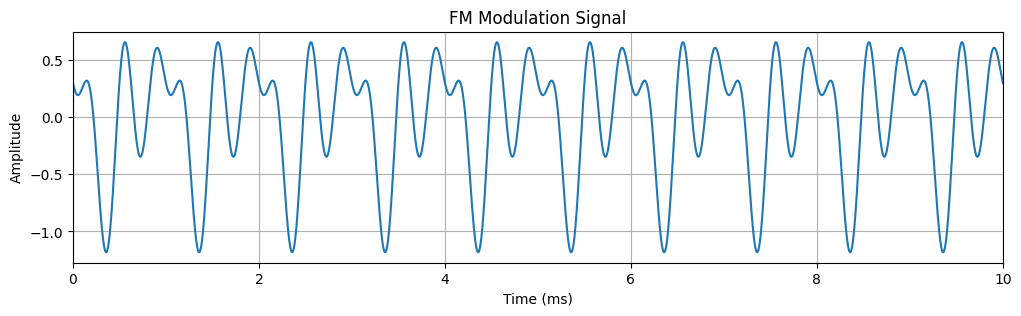

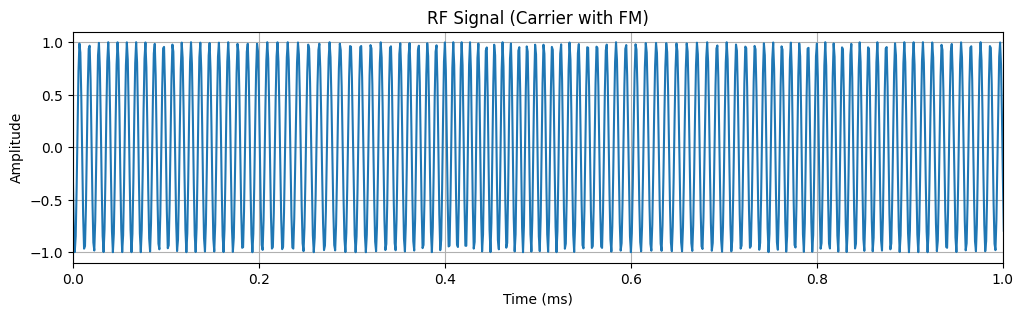

In [3]:
plt.figure(figsize=(12, 3))
plt.plot(t, FM)
plt.title("FM Modulation Signal")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.xlim([0, 10])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(t, RF)
plt.title("RF Signal (Carrier with FM)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.xlim([0, 1])
plt.grid(True)
plt.show()


### Frequency Domain Analysis

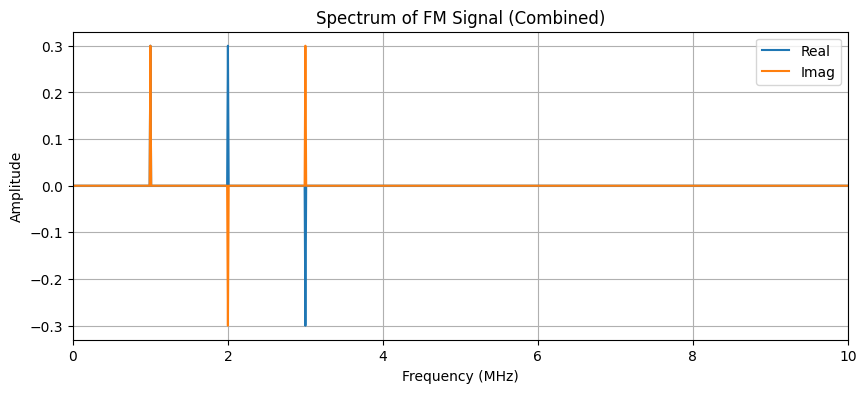

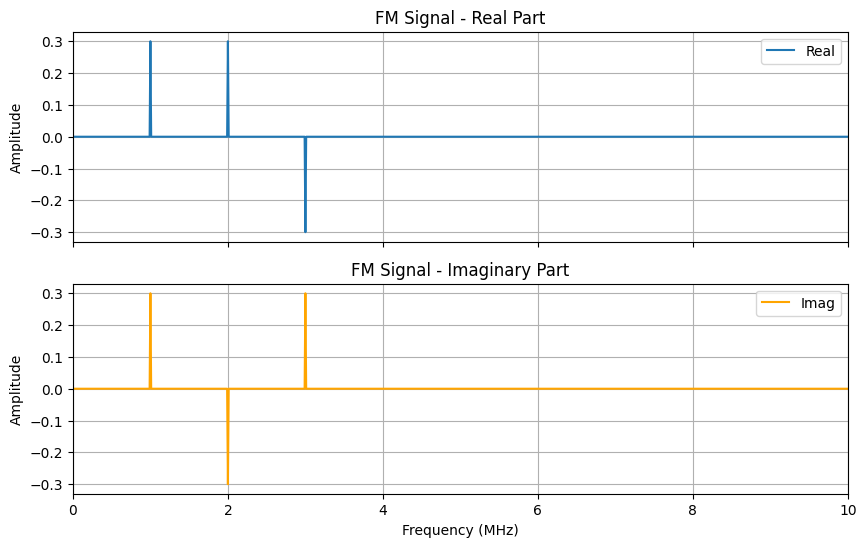

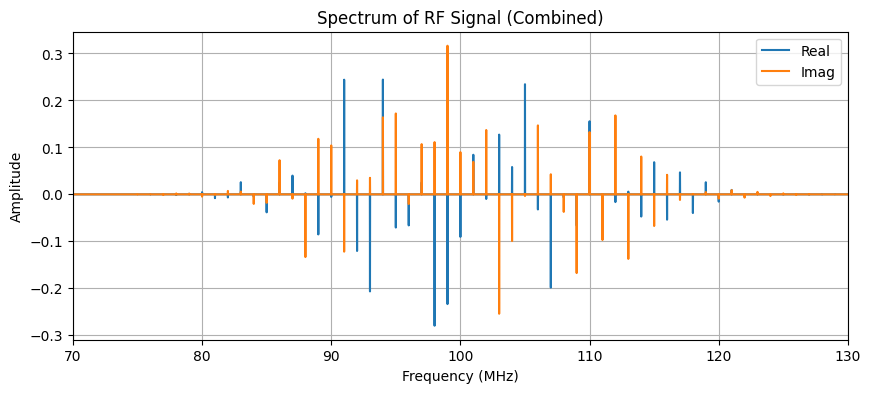

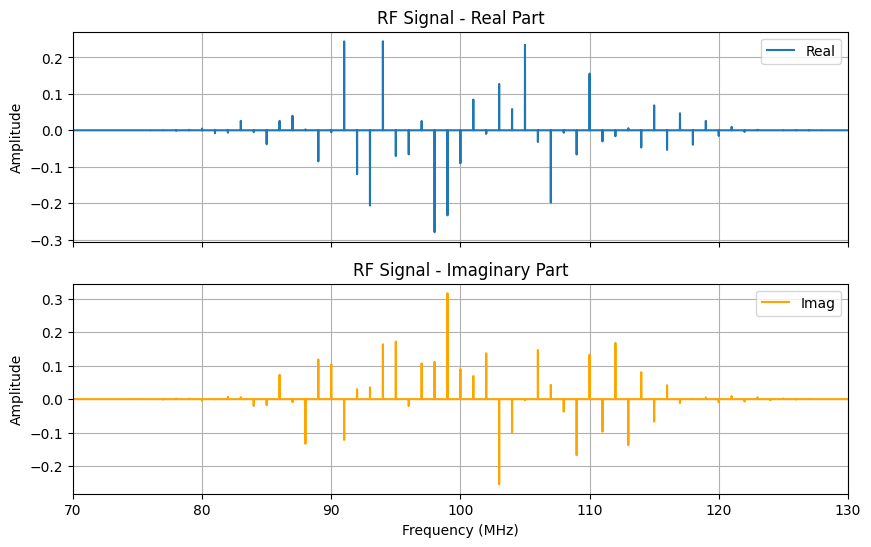

In [4]:
# FFT of FM signal
spekFM = np.fft.fft(FM) / (L / 2)
aspekFM = np.real(spekFM[:L // 2])
bspekFM = np.imag(spekFM[:L // 2])

# --- Combined plot: FM ---
plt.figure(figsize=(10, 4))
plt.plot(f, aspekFM, label='Real')
plt.plot(f, bspekFM, label='Imag')
plt.title("Spectrum of FM Signal (Combined)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([0, 10])
plt.grid(True)
plt.show()

# --- Separate plots: FM ---
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
axs[0].plot(f, aspekFM, label='Real')
axs[0].set_title("FM Signal - Real Part")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(f, bspekFM, label='Imag', color='orange')
axs[1].set_title("FM Signal - Imaginary Part")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid(True)

plt.xlim([0, 10])
plt.show()

# FFT of RF signal
spekRF = np.fft.fft(RF) / (L / 2)
aspekRF = np.real(spekRF[:L // 2])
bspekRF = np.imag(spekRF[:L // 2])

# --- Combined plot: RF ---
plt.figure(figsize=(10, 4))
plt.plot(f, aspekRF, label='Real')
plt.plot(f, bspekRF, label='Imag')
plt.title("Spectrum of RF Signal (Combined)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim([70, 130])
plt.grid(True)
plt.show()

# --- Separate plots: RF ---
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
axs[0].plot(f, aspekRF, label='Real')
axs[0].set_title("RF Signal - Real Part")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(f, bspekRF, label='Imag', color='orange')
axs[1].set_title("RF Signal - Imaginary Part")
axs[1].set_xlabel("Frequency (MHz)")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid(True)

plt.xlim([70, 130])
plt.show()